In [130]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import glm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
from patsy import dmatrix

Index(['color', 'spine', 'width', 'sat', 'weight', 'y'], dtype='object')
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    sat   No. Observations:                  173
Model:                            GLM   Df Residuals:                      170
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -457.60
Date:                Mon, 15 Feb 2021   Deviance:                       559.90
Time:                        11:54:06   Pearson chi2:                     537.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------

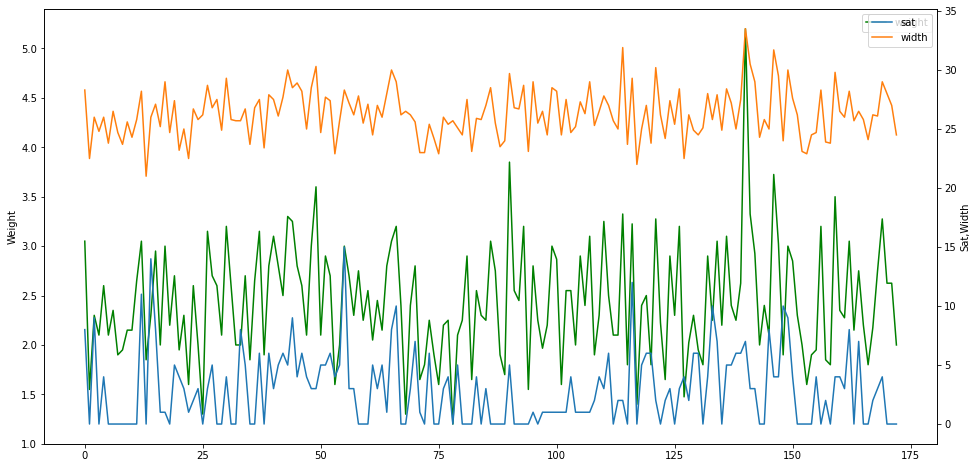

In [52]:
#crab_df=pd.read_csv('crab_sat.csv',sep="\s+")
crab_df=pd.read_csv('horse_shoe_crab.csv',sep="\s+")
print(crab_df.columns)

crab_df['weight']=crab_df['weight']/1000

# Fit Poisson regression of sat by weight
model = glm('sat ~ weight+width', data =crab_df, family = sm.families.Poisson()).fit()

# Display model results
print(model.summary())
fig,ax =plt.subplots(figsize=(16,8))
crab_df[['weight']].plot(ax=ax,c="Green")
plt.ylabel("Weight")

ax2=ax.twinx()
crab_df[['sat','width']].plot(ax=ax2)
plt.ylabel('Sat,Width')
plt.show()

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


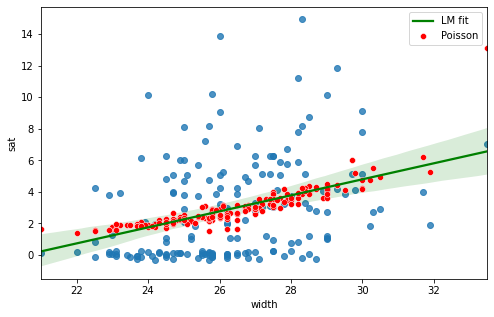

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='weight', ylabel='sat'>

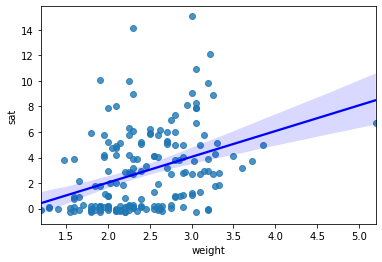

In [53]:
crab_df['fit_values']=model.fittedvalues

plt.subplots(figsize=(8,5))

sns.regplot('width','sat',
data=crab_df,
fit_reg=True,
y_jitter=0.3,
line_kws={'color':'green',
'label':'LM fit'})

sns.scatterplot('width','fit_values',
    data=crab_df,
    color='red',
    label='Poisson')
plt.show()

sns.regplot('weight','sat',
data=crab_df,
fit_reg=True,
y_jitter=0.3,
line_kws={'color':'blue',
'label':'LM fit'})


In [54]:
formula='y ~ weight + width'

model=glm(formula,
    data=crab_df,
    family=sm.families.Binomial()).fit()

print(model.summary())
b0,b1,b2 = model.params

print(np.exp(b0))
print(np.exp(b1))
print(np.exp(b2))


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  173
Model:                            GLM   Df Residuals:                      170
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -96.446
Date:                Mon, 15 Feb 2021   Deviance:                       192.89
Time:                        11:54:13   Pearson chi2:                     167.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.3547      3.528     -2.652      0.0

In [55]:
X = crab_df[['weight','width','color']]
X['Intercept'] = 1

# Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# View results using print
print(vif)
print("weight and width can not be used together because they are collinear > 2.5")

   variables         VIF
0     weight    4.691018
1      width    4.726378
2      color    1.076594
3  Intercept  431.555458
weight and width can not be used together because they are collinear > 2.5


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
formula='y ~ weight'

model=glm(formula,
    data=crab_df,
    family=sm.families.Binomial()).fit()

print(model.summary())
b0,b1 = model.params
#print(np.exp(b0),np.exp(b1))
weight_deviance=model.null_deviance-model.deviance

formula='y ~ width'

model=glm(formula,
    data=crab_df,
    family=sm.families.Binomial()).fit()

width_deviance=model.null_deviance-model.deviance

print("weight deviance {} width deviance {}".format(weight_deviance, width_deviance))

print('Width contributes more than weight for determine sat count')


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  173
Model:                            GLM   Df Residuals:                      171
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -97.869
Date:                Mon, 15 Feb 2021   Deviance:                       195.74
Time:                        11:54:19   Pearson chi2:                     168.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.6947      0.880     -4.198      0.0

In [138]:
print(crab_df['color'].value_counts())

print(dmatrix('C(color)', data =crab_df, return_type = 'dataframe').head())

print(dmatrix('C(color, Treatment(2))', 
        data = crab_df,
        return_type = 'dataframe').head())

3    95
4    44
5    22
2    12
Name: color, dtype: int64
   Intercept  C(color)[T.3]  C(color)[T.4]  C(color)[T.5]
0        1.0            1.0            0.0            0.0
1        1.0            0.0            1.0            0.0
2        1.0            0.0            0.0            0.0
3        1.0            0.0            1.0            0.0
4        1.0            0.0            1.0            0.0
   Intercept  C(color, Treatment(2))[T.3]  C(color, Treatment(2))[T.4]  \
0        1.0                          1.0                          0.0   
1        1.0                          0.0                          1.0   
2        1.0                          0.0                          0.0   
3        1.0                          0.0                          1.0   
4        1.0                          0.0                          1.0   

   C(color, Treatment(2))[T.5]  
0                          0.0  
1                          0.0  
2                          0.0  
3                

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    sat   No. Observations:                  173
Model:                            GLM   Df Residuals:                      171
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -458.08
Date:                Mon, 15 Feb 2021   Deviance:                       560.87
Time:                        15:06:22   Pearson chi2:                     536.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4284      0.179     -2.394      0.0

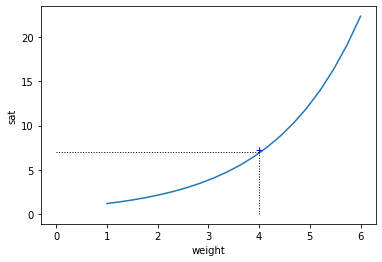

for every sat unit multiple by 1.8027335249990852
                  0         1
Intercept  0.458813  0.925243
weight     1.587044  2.047737
b1 1.8027335249990852 confidence interval 1.5870435429455083 thru 2.0477372385914507


In [136]:
# Fit Poisson regression of sat by weight
model = glm('sat ~ weight', data =crab_df, family = sm.families.Poisson()).fit()

# Display model results
print(model.summary())

df2=pd.DataFrame()
df2['weight']=np.linspace(1,6,20)

prediction=model.predict(df2)
plt.plot(df2['weight'],prediction)
plt.xlabel('weight')
plt.ylabel('sat')
#print(crab_df['weight'].min())
#print(crab_df['weight'].max())

xs=[4]*6
ys=np.linspace(0,int(4*b1),6)
ys2=[int(4*b1)]*6
xs2=np.linspace(0,4,6)

b0,b1 = np.exp(model.params)

plt.plot(xs, ys,'k-', linestyle = ":", lw=1)
plt.plot(xs2, ys2,'k-', linestyle = ":", lw=1)
plt.plot(4, 4*b1, 'b+')
#plt.plot(,'k-', linestyle = ":", lw=1)
plt.show()
print("for every sat unit multiple by {}".format(b1))

print(np.exp(model.conf_int()))
      
results=np.exp(model.conf_int())
low_conf=results[0][1]
high_conf=results[1][1]
    

print("b1 {} confidence interval {} thru {}".format(b1, low_conf,high_conf))
      

In [113]:
print('Working with lambda')

model = glm('sat ~ width', data = crab_df, family = sm.families.Poisson()).fit()

# Compute average crab width
mean_width = np.mean(crab_df['width'])

# Print the compute mean
print('Average width: ', round(mean_width, 3))

# Extract coefficients
intercept, slope = model.params

# Compute the estimated mean of y (lambda) at the average width
est_lambda = np.exp(intercept) * np.exp(slope * mean_width)

# Print estimated mean of y
print('Estimated mean of y at average width: ', round(est_lambda, 3))

print("A crab with average width {} is expected to have {} satelites ".format(mean_width,est_lambda))


Working with lambda
Average width:  26.299
Estimated mean of y at average width:  2.744
A crab with average width 26.298843930635844 is expected to have 2.7440609048679754 satelites 


In [117]:
print("analyzing dispersion")

y_mean = crab_df['sat'].mean()
y_variance = crab_df['sat'].var()

print("{} multiple of mean/variance".format(y_variance/y_mean))
print("over dispersion has occurred because the variance > the mean")

analyzing dispersion
3.3956021183513694 multiple of mean/variance
over dispersion has occurred because the variance > the mean


In [124]:
sat_mean=crab_df['sat'].mean()
# Expected number of zero counts
exp_zero_cnt = ((sat_mean**0)*np.exp(-sat_mean))/math.factorial(0)

# Print exp_zero_counts
print('Expected zero counts given mean of ', round(sat_mean,3), 
      'is ', round(exp_zero_cnt,3)*100)

# Number of zero counts in sat variable
actual_zero_ant = sum(crab_df['sat'] == 0)

# Number of observations in crab dataset
num_obs = len(crab_df)

# Print the percentage of zero count observations in the sample
print('Actual zero counts in the sample: ', round(actual_zero_ant / num_obs,3)*100)
print("there should be {}% observations with zero count, but in the crab sample there are {}% observations with zero count".format(round(exp_zero_cnt,3)*100,round(actual_zero_ant / num_obs,3)*100))
print("Overdispersion occurred")

Expected zero counts given mean of  2.919 is  5.4
Actual zero counts in the sample:  35.8
there should be 5.4% observations with zero count, but in the crab sample there are 35.8% observations with zero count
Overdispersion occurred
